In [57]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 
  
# reading image 
img = cv2.imread('cone_predict.jpg')
# r = 500.0 / image.shape[1]
# dim = (500, int(image.shape[0] * r))
# # perform the actual resizing of the image
# resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
# # cv2.imshow("Resized (Width)", resized)
# # cv2.waitKey(0) 
# # cv2.destroyAllWindows()
# image=resized

# Grayscale 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
img=gray
# print(gray.shape)

# Find Canny edges 
edged = cv2.Canny(gray, 30, 200) 
cv2.waitKey(0)
img = edged

# # contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
  
# cv2.imshow('Canny Edges After Contouring', edged) 
# cv2.waitKey(0)


# using a findContours() function 
contours, _ = cv2.findContours( 
    threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
  
i = 0
  
# list for storing names of shapes 
for contour in contours:
    
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    if area>500:
        print(contour)
        print("Area:",area,"Perimeter:",perimeter,"Len:",len(contour[0]))
        # here we are ignoring first counter because  
        # findcontour function detects whole image as shape 
        if i == 0: 
            i = 1
            continue

        # cv2.approxPloyDP() function to approximate the shape 
        approx = cv2.approxPolyDP( 
            contour, 0.01 * cv2.arcLength(contour, True), True) 
        print(len(approx))
        cv2.drawContours(img, [contour], 0, (255, 0, 0), 5) 
  
cv2.imshow('After Contouring', img) 
cv2.waitKey(0)
cv2.destroyAllWindows()

[[[ 46 179]]

 [[ 45 180]]

 [[ 46 181]]

 [[ 46 184]]

 [[ 45 185]]

 [[ 44 184]]

 [[ 44 183]]

 [[ 44 184]]

 [[ 43 185]]

 [[ 42 184]]

 [[ 42 183]]

 [[ 39 183]]

 [[ 40 184]]

 [[ 38 186]]

 [[ 38 189]]

 [[ 40 187]]

 [[ 41 187]]

 [[ 41 185]]

 [[ 42 184]]

 [[ 43 185]]

 [[ 43 187]]

 [[ 44 186]]

 [[ 45 186]]

 [[ 46 187]]

 [[ 44 189]]

 [[ 42 189]]

 [[ 41 190]]

 [[ 40 190]]

 [[ 39 191]]

 [[ 37 191]]

 [[ 34 188]]

 [[ 35 187]]

 [[ 36 187]]

 [[ 35 187]]

 [[ 34 188]]

 [[ 33 188]]

 [[ 34 188]]

 [[ 36 190]]

 [[ 36 192]]

 [[ 34 194]]

 [[ 32 194]]

 [[ 31 193]]

 [[ 33 191]]

 [[ 33 190]]

 [[ 32 190]]

 [[ 31 189]]

 [[ 31 188]]

 [[ 30 189]]

 [[ 31 189]]

 [[ 32 190]]

 [[ 31 191]]

 [[ 29 191]]

 [[ 28 192]]

 [[ 26 190]]

 [[ 26 189]]

 [[ 29 186]]

 [[ 28 187]]

 [[ 27 186]]

 [[ 26 186]]

 [[ 26 187]]

 [[ 24 189]]

 [[ 23 189]]

 [[ 22 188]]

 [[ 23 187]]

 [[ 23 186]]

 [[ 20 186]]

 [[ 19 187]]

 [[ 17 187]]

 [[ 16 186]]

 [[ 15 187]]

 [[ 14 187]]

 [[ 12

In [2]:
resized.shape

(200, 150, 3)

In [17]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 
  
# reading image 
img = cv2.imread('cone_predict.jpg') 

r = 150.0 / img.shape[1]
dim = (150, int(img.shape[0] * r))
# perform the actual resizing of the image
img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
  
# converting image into grayscale image 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
# setting threshold of gray image 
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY) 
  
# using a findContours() function 
contours, _ = cv2.findContours( 
    threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
  
i = 0
  
# list for storing names of shapes 
for contour in contours: 
  
    # here we are ignoring first counter because  
    # findcontour function detects whole image as shape 
    if i == 0: 
        i = 1
        continue
  
    # cv2.approxPloyDP() function to approximate the shape 
    approx = cv2.approxPolyDP( 
        contour, 0.01 * cv2.arcLength(contour, True), True) 
      
    # using drawContours() function 
    cv2.drawContours(img, [contour], 0, (0, 0, 255), 5) 
  
    # finding center point of shape 
    M = cv2.moments(contour) 
    if M['m00'] != 0.0: 
        x = int(M['m10']/M['m00']) 
        y = int(M['m01']/M['m00']) 
  
    # putting shape name at center of each shape 
#     if len(approx) == 3: 
#         cv2.putText(img, 'Triangle', (x, y), 
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) 
  
#     elif len(approx) == 4: 
#         cv2.putText(img, 'Quadrilateral', (x, y), 
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) 
  
#     elif len(approx) == 5: 
#         cv2.putText(img, 'Pentagon', (x, y), 
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) 
  
#     elif len(approx) == 6: 
#         cv2.putText(img, 'Hexagon', (x, y), 
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) 
  
#     else: 
#         cv2.putText(img, 'circle', (x, y), 
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) 
  
# displaying the image after drawing contours 
cv2.imshow('shapes', img) 
  
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [15]:
  
# setting threshold of gray image 
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY) 
  
# using a findContours() function 
# contours, _ = cv2.findContours( 
    threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
  
i = 0
  
# list for storing names of shapes 
for contour in contours: 
  
    # here we are ignoring first counter because  
    # findcontour function detects whole image as shape 
    if i == 0: 
        i = 1
        continue
  
    # cv2.approxPolyDP() function to approximate the shape 
    approx = cv2.approxPolyDP( 
        contour, 0.01 * cv2.arcLength(contour, True), True) 
      
    # using drawContours() function 
    cv2.drawContours(img, [contour], 0, (0, 0, 255), 5) 
  
    # finding center point of shape 
    M = cv2.moments(contour) 
    print("#######",M['m00'])
    if M['m00'] != 0.0: 
        x = int(M['m10']/M['m00']) 
        y = int(M['m01']/M['m00']) 
  
    # putting shape name at center of each shape 
#     if len(approx) == 3: 
#         cv2.putText(img, 'Triangle', (x, y), 
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) 
  
#     elif len(approx) == 4: 
#         cv2.putText(img, 'Quadrilateral', (x, y), 
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) 
  
#     elif len(approx) == 5: 
#         cv2.putText(img, 'Pentagon', (x, y), 
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) 
  
#     elif len(approx) == 6: 
#         cv2.putText(img, 'Hexagon', (x, y), 
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) 
  
#     else: 
#         cv2.putText(img, 'circle', (x, y), 
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) 
  
# displaying the image after drawing contours 
cv2.imshow('shapes', img) 
  
cv2.waitKey(0) 
cv2.destroyAllWindows() 

####### 0.0
####### 1.0
####### 1.5
####### 0.0
####### 8.0
####### 4.5
####### 0.0
####### 0.0
####### 0.0
####### 0.0
####### 0.0
####### 0.0
####### 0.0
####### 0.0
####### 0.0
####### 9.0
####### 0.0
####### 0.0
####### 0.0
####### 0.0
####### 0.0
####### 0.0
####### 0.0
####### 0.0
####### 3.5
####### 2.0
####### 0.0
####### 0.0
####### 0.0
####### 0.0
####### 0.0
####### 0.0
####### 0.0
####### 0.5
####### 0.0
####### 0.0
####### 0.0
####### 0.0
####### 4.5
####### 0.0
####### 0.0
####### 0.5
####### 1.5
####### 0.0
####### 0.0
####### 0.0
####### 0.0
####### 0.5
####### 0.0
####### 2.0
####### 5.0
####### 0.0
####### 0.0
####### 0.0
####### 0.5
####### 2.5
####### 0.0
####### 0.0
####### 0.0
####### 0.0
####### 0.0
####### 0.0
####### 0.0
####### 1.0
####### 0.0
####### 0.0
####### 1075.5
####### 2.0
####### 4.0
####### 2.0
####### 2.0
####### 2.0
####### 5.5
####### 8.0
####### 16.5
####### 9.0
####### 9.0
####### 4.0
####### 2.0
####### 54.5
####### 2.0
####### 10.0
####### 19

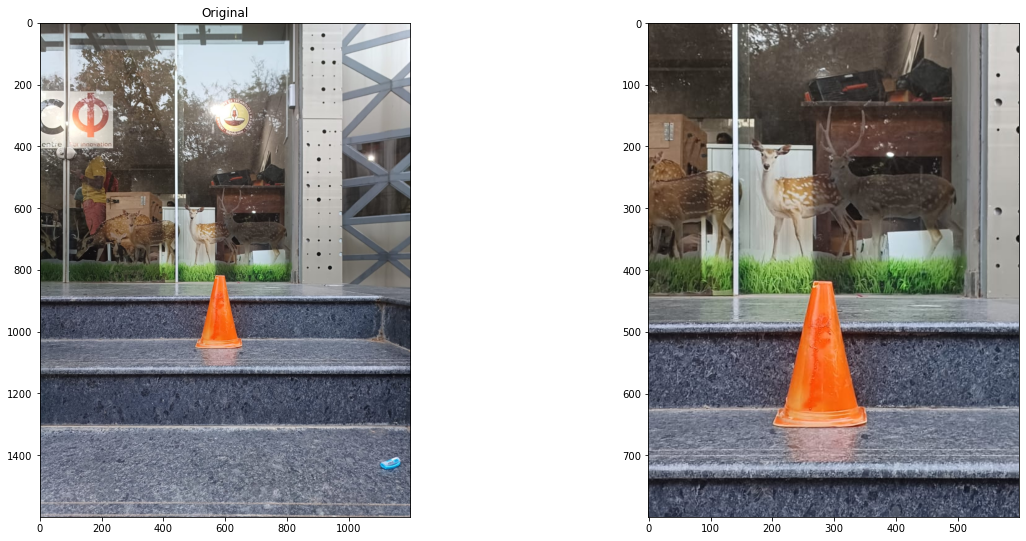

In [47]:
image = cv2.imread('cone_predict.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)
hgt, wdt = image.shape[:2]
start_row, start_col = int(hgt * .25), int(wdt * .25)
end_row, end_col = int(hgt * .75), int(wdt * .75)
cropped = image[start_row:end_row , start_col:end_col]
plt.subplot(2, 2, 2)
plt.imshow(cropped)

In [19]:
import cv2 
import numpy as np 
  
image = cv2.imread('cone_predict.jpg')
  
if True:
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 
#     cv2.imshow('hsv', hsv)
#     cv2.waitKey(0) 
#     cv2.destroyAllWindows() 
      
    # Threshold of blue in HSV space 
#     lower_blue = np.array([18, 91, 93]) 
#     upper_blue = np.array([28, 77, 90]) 
  
#     # preparing the mask to overlay 
#     mask = cv2.inRange(hsv, lower_orange, upper_orange) 
    mask = cv2.inRange(hsv,(10, 170, 20), (25, 255, 255) )

      
    # The black region in the mask has the value of 0, 
    # so when multiplied with original image removes all non-orange regions 
    result = cv2.bitwise_and(image, image, mask = mask) 
  
    cv2.imshow('frame', image) 
    cv2.imshow('mask', mask) 
    cv2.imshow('result', result) 
      
    cv2.waitKey(0)
    cv2.destroyAllWindows() 

In [20]:
img=result
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
img=gray
# print(gray.shape)

# Find Canny edges 
# edged = cv2.Canny(gray, 30, 200) 
# cv2.waitKey(0)
# img = edged

# # contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
  
# cv2.imshow('Canny Edges After Contouring', edged) 
# cv2.waitKey(0)

_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY) 

# using a findContours() function 
contours, _ = cv2.findContours( 
    threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
  
i = 0
img2 = img.copy()  
# list for storing names of shapes 
for contour in contours:
    
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    if True: #area>500:
        print(contour)
        print("Area:",area,"Perimeter:",perimeter)
        # here we are ignoring first counter because  
        # findcontour function detects whole image as shape 
        if i == 0: 
            i = 1
            continue

        # cv2.approxPloyDP() function to approximate the shape 
        approx = cv2.approxPolyDP( 
            contour, 0.01 * cv2.arcLength(contour, True), True) 
        print(len(approx))
        cv2.drawContours(img, [contour], 0, (255, 0, 0), 5) 
  
cv2.imshow('After Contouring', img) 
cv2.waitKey(0)
cv2.destroyAllWindows()

[[[ 631 1048]]]
Area: 0.0 Perimeter: 0.0
[[[ 527 1048]]

 [[ 527 1049]]

 [[ 530 1049]]

 [[ 529 1049]]

 [[ 528 1048]]]
Area: 1.5 Perimeter: 7.414213538169861
5
[[[ 609 1047]]

 [[ 608 1048]]

 [[ 608 1049]]

 [[ 615 1049]]

 [[ 616 1048]]

 [[ 618 1048]]

 [[ 619 1047]]

 [[ 620 1047]]

 [[ 616 1047]]

 [[ 615 1048]]

 [[ 614 1048]]

 [[ 613 1047]]]
Area: 15.5 Perimeter: 27.071067690849304
12
[[[ 626 1046]]

 [[ 627 1047]]

 [[ 629 1047]]

 [[ 629 1046]]]
Area: 2.5 Perimeter: 7.414213538169861
4
[[[ 535 1040]]

 [[ 534 1041]]

 [[ 534 1042]]

 [[ 536 1042]]

 [[ 537 1043]]

 [[ 549 1043]]

 [[ 548 1043]]

 [[ 547 1042]]

 [[ 545 1042]]

 [[ 544 1041]]

 [[ 543 1041]]

 [[ 542 1040]]]
Area: 29.5 Perimeter: 33.071067690849304
10
[[[ 509 1039]]

 [[ 509 1040]]

 [[ 507 1042]]

 [[ 507 1043]]

 [[ 506 1044]]

 [[ 506 1047]]

 [[ 507 1047]]

 [[ 508 1048]]

 [[ 512 1048]]

 [[ 513 1049]]

 [[ 514 1049]]

 [[ 515 1048]]

 [[ 519 1048]]

 [[ 520 1047]]

 [[ 521 1047]]

 [[ 519 1047]]

 [[ 5

In [21]:
import cv2 
import numpy as np

count=0
cv2.imshow('gray', img)
cv2.waitKey(0)

_,threshold = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY) 
cv2.imshow('Threshold Image', threshold)
cv2.imwrite('Threshold.jpg', threshold)
cv2.waitKey(0)

contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
cv2.imshow('Contours', img)
cv2.imwrite('Contours.jpg', img)
cv2.waitKey(0)

image2 = img
for contour in contours:
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour,0.05 * cv2.arcLength(contour, True), True)
    if len(approx) == 3	:
        cv2.drawContours(image2, contour, -1, (255, 0, 0), 3)
        count = count + 1

print("Number of Triangles in the image: " + str(count)) 
cv2.imshow('Triangles Detected', image2)
cv2.imwrite('Triangles.jpg', image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of Triangles in the image: 3
